<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Daniel Quilodrán
- Nombre de alumno 2: Katherine Rutte


### **Link de repositorio de GitHub:** `https://github.com/quilo98/Labs_MDS`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [4]:
!pip install --upgrade plotly

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [16]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí 
```
El analisis univariable se refiere a estudiar el comportamiento de una variable de forma individual, con el objetivo de comprender como cada variable por si sola influye en el problema a resolver. Se ocupan distintas tecnicas estadisticas y graficas para analizar variables numericas y categoricas
El analisis multivariable es utilizado para estudiar la interacción entre variables, es decir se estudia mas de una variable simultaneamente con el objetivo de identificar relaciones entre ellas.
Con respecto al analisis de datos faltantes es el proceso de identificar valores faltantes en el conjunto de datos para posteriormente aplicar tecnicas de imputacion de valores faltantes.
```

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [13]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )
    
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [14]:
# Analisis de Price
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la primera serie...

In [17]:
# Analisis de Invoice
profile_serie(df_retail["Invoice"])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

In [18]:
# Analisis de StockCode
profile_serie(df_retail["StockCode"])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

In [20]:
# Analisis de Description
profile_serie(df_retail["Description"])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

In [21]:
# Analisis de Quantity
profile_serie(df_retail["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

In [22]:
# Analisis de invoice date
profile_serie(df_retail["InvoiceDate"])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

In [23]:
# Analisis de customer ID
profile_serie(df_retail["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

In [24]:
# Analisis de country
profile_serie(df_retail["Country"])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Análisis de la n-esima serie...

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [25]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

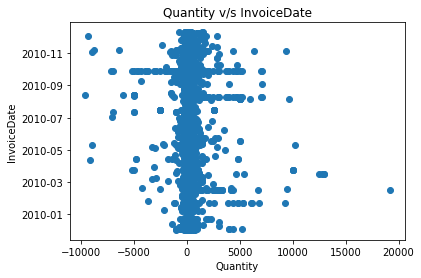

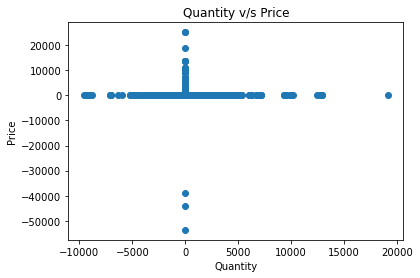

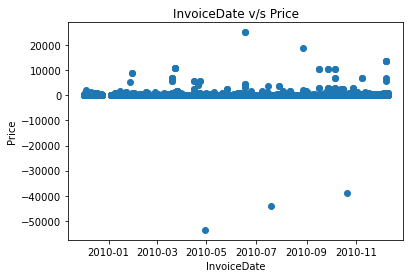

## Correlation:

## Missing Matrix:

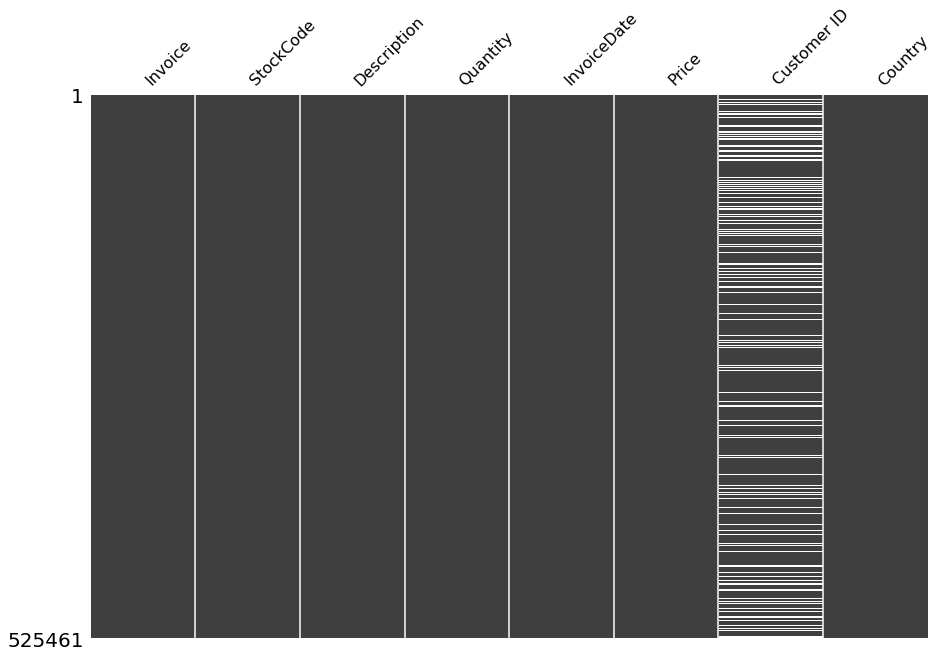

In [26]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
Código Aquí

### 1.2.4 Obtención de TOPs [0.75 ptos]

In [27]:
def exploratory_data_analysis(dataframe):
    # Dimensiones del dataframe
    print('1.- El DataFrame tiene {i} filas y {j} columnas'.format(i = dataframe.shape[0], j = dataframe.shape[1]))
    print(" ")
    
    # Nombres de las columnas que conforman el dataframe
    print("2.- El DataFrame esta compuesto por las siguientes columnas: {cols}".format(cols=list(dataframe.columns)))
    print(" ")

    # Primeros 5 elementos, ultimos 5 elementos y sample de 5 elementos
    print("3.- Ejemplos de filas del DataFrame")
    print("Primeras 5 filas:")
    display(dataframe.head(5))
    print(" ")
    print("Ultimas 5 filas:")
    display(dataframe.tail(5))
    print(" ")
    print("Muestreo aleatorio de 5 filas:")
    display(dataframe.sample(n=5, random_state=42))
    print(" ")

    # Descripcion numerica del dataframe
    print("4.- Descripcion numerica del DataFrame:")
    display(dataframe.describe())
    print(" ")

    # Cantidad de valores nulos
    print("5.- Cantidad de valores nulos por columna:")
    print(dataframe.isna().sum())
    print(" ")

    # Cantidad de valores unicos
    print("6.- Cantidad de valores únicos por columna:")
    display(dataframe.nunique())
    print(" ")

In [28]:
exploratory_data_analysis(df_retail)

1.- El DataFrame tiene 525461 filas y 8 columnas
 
2.- El DataFrame esta compuesto por las siguientes columnas: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
 
3.- Ejemplos de filas del DataFrame
Primeras 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 
Ultimas 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


 
Muestreo aleatorio de 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
391453,527050,20750,RED RETROSPOT MINI CASES,6,2010-10-14 12:54:00,7.95,17717.0,United Kingdom
440086,531382,82583,HOT BATHS METAL SIGN,3,2010-11-07 16:29:00,2.10,16549.0,United Kingdom
369036,525059,22951,72 CAKE CASES DOLLY GIRL DESIGN,48,2010-10-03 14:08:00,0.55,15978.0,United Kingdom
232578,511928,21915,RED HARMONICA IN BOX,12,2010-06-11 11:45:00,1.25,15141.0,United Kingdom
41357,492792,22311,OFFICE MUG WARMER BLACK+SILVER,12,2009-12-20 10:08:00,4.95,17243.0,United Kingdom


 
4.- Descripcion numerica del DataFrame:


,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


 
5.- Cantidad de valores nulos por columna:
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
 
6.- Cantidad de valores únicos por columna:


Invoice        28816
StockCode       4632
Description     4682
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [60]:
# Ingresos vs nombre del producto
# Calculamos los ingresos como = Price * Quantity y luego agrupamos por producto 

#Agregamos ventas totales
df_retail["TotalSales"] = df_retail["Price"]*df_retail["Quantity"]

#Agrupamos por descripcion
df_product_sales = df_retail.groupby("Description")["TotalSales"].sum().reset_index()
df_product_sales.head()

,Description,TotalSales
0,DOORMAT UNION JACK GUNS AND ROSES,1206.81
1,3 STRIPEY MICE FELTCRAFT,1340.08
2,4 PURPLE FLOCK DINNER CANDLES,298.11
3,ANIMAL STICKERS,80.85
4,BLACK PIRATE TREASURE CHEST,111.78


In [43]:
df_top30_sales = df_product_sales.sort_values(by="TotalSales", ascending=False).head(30)
df_top30_sales

,Description,TotalSales
3371,REGENCY CAKESTAND 3 TIER,163051.46
4402,WHITE HANGING HEART T-LIGHT HOLDER,157865.43
1297,DOTCOM POSTAGE,116401.99
279,ASSORTED COLOUR BIRD ORNAMENT,72454.12
2780,PAPER CHAIN KIT 50'S CHRISTMAS,57870.20
2158,JUMBO BAG RED RETROSPOT,56444.61
2794,PARTY BUNTING,49645.52
3492,ROTATING SILVER ANGELS T-LIGHT HLDR,47672.49
3165,POSTAGE,46092.36
2162,JUMBO BAG STRAWBERRY,36699.61


In [47]:
# Visualizacion de TOP 30 de acuerdo a los ingresos generados
fig = px.bar(df_top30_sales,
             x="Description",
             y="TotalSales",
             title="Top 30 productos por ganancias",
             labels={"Description": "Descripción del producto", "TotalSales": "Ganancias totales"})


fig.update_layout(height=600)

fig.show()


In [45]:
# Cantidad vs descripcion
df_product_quantity = df_retail.groupby("Description")["Quantity"].sum().reset_index()
df_product_quantity.head()

,Description,Quantity
0,DOORMAT UNION JACK GUNS AND ROSES,179
1,3 STRIPEY MICE FELTCRAFT,690
2,4 PURPLE FLOCK DINNER CANDLES,207
3,ANIMAL STICKERS,385
4,BLACK PIRATE TREASURE CHEST,57


In [46]:
df_top30_q = df_product_quantity.sort_values(by="Quantity", ascending=False).head(30)
df_top30_q

,Description,Quantity
4402,WHITE HANGING HEART T-LIGHT HOLDER,57733
4509,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
721,BROCADE RING PURSE,47647
2744,PACK OF 72 RETRO SPOT CAKE CASES,46106
279,ASSORTED COLOUR BIRD ORNAMENT,44925
147,60 TEATIME FAIRY CAKE CASES,36326
2742,PACK OF 60 PINK PAISLEY CAKE CASES,31822
2158,JUMBO BAG RED RETROSPOT,30727
3984,SMALL POPCORN HOLDER,29500
4067,STRAWBERRY CERAMIC TRINKET BOX,26563


In [48]:
# Visualizacion de TOP 30 de acuerdo a las cantidades vendidas
fig = px.bar(df_top30_q,
             x="Description",
             y="Quantity",
             title="Top 30 productos por cantidad vendida",
             labels={"Description": "Descripción del producto", "Quantity": "Cantidades"})


fig.update_layout(height=600)

fig.show()

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [58]:
dfprueba = df_retail.copy()
dfprueba["InvoiceDate"] = dfprueba['InvoiceDate'].dt.date
dfprueba["TotalSales"] = dfprueba["Price"]*dfprueba["Quantity"]
dfprueba2 = dfprueba.groupby("InvoiceDate")["TotalSales"].sum().reset_index()
dfprueba2.head()
px.line(dfprueba2, y="TotalSales", x="InvoiceDate")


Hay valores de price y quantity negativos, esto no debiese ser posible ya que el precio de un producto no puede ser negativo y la cantidad vendida de este tampoco.
En verdad no estoy segura hay que verlo ajjajaj

In [61]:

# Filtrar las filas con valores negativos en la columna 'Price'
prices_negativos = df_retail[df_retail['Price'] < 0]

# Filtrar las filas con valores negativos en la columna 'Quantity'
quantity_negativos = df_retail[df_retail['Quantity'] < 0]

# Imprimir las filas con valores negativos en la columna 'Price'
print("Valores negativos en la columna 'Price':")
print(prices_negativos)

# Imprimir las filas con valores negativos en la columna 'Quantity'
print("\nValores negativos en la columna 'Quantity':")
print(quantity_negativos)

Valores negativos en la columna 'Price':
        Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price Customer ID         Country  TotalSales  
179403 -53594.36         NaN  United Kingdom   -53594.36  
276274 -44031.79         NaN  United Kingdom   -44031.79  
403472 -38925.87         NaN  United Kingdom   -38925.87  

Valores negativos en la columna 'Quantity':
        Invoice StockCode                    Description  Quantity  \
178     C489449     22087       PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896             POTTING SHED TWINE        -6   
182     C489449     220

In [7]:
# df_retail["InvoiceDate"]
def plot_ventas(dataframe):
    dataframe["InvoiceDate"] = dataframe["InvoiceDate"].dt.date
    dataframe["TotalSales"] = dataframe["Price"]*dataframe["Quantity"]
    px.line(dataframe, y="")
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>